# **Setup**

In [1]:
import tensorflow as tf
import os


In [2]:
# avpiod out of memory error by setting gpu memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# **Removing dodgy images**

In [4]:
import cv2
import imghdr
import matplotlib as mp

In [5]:
data_dir='/content/drive/MyDrive/Datasets/data'

In [6]:
# creating a list of supported extensions
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
# listing all the folders inside data folder
os.listdir(data_dir)
# listing all the files inside data > apples
os.listdir(os.path.join(data_dir,'apples'))

['images2.jpg',
 'Shutterstock_2095604728.jpg',
 '25.jpg',
 '0a5ae820-7051-4495-bcca-61bf02897472.jpg',
 'images.jpg',
 'images7.jpg',
 'images3.jpg',
 'images5.jpg',
 'images4.jpg',
 'images6.jpg',
 'image2.jpeg',
 'image4.jpeg',
 'image3.jpeg',
 'image.jpeg',
 'images8.jpg',
 'image5.jpeg',
 'image7.jpeg',
 'image10.jpeg',
 'image6.jpeg',
 'image9.jpeg',
 'image8.jpeg',
 'image13.jpeg',
 'image15.jpeg',
 'image16.jpeg',
 'image12.jpeg',
 'image11.jpeg',
 'image14.jpeg',
 'image19.jpeg',
 'image22.jpeg',
 'image18.jpeg',
 'image21.jpeg',
 'image17.jpeg',
 'image20.jpeg',
 'image30.png',
 'image23.jpeg',
 'image31.png',
 'image26.jpeg',
 'image24.jpeg',
 'image29.jpeg',
 'image28.jpeg',
 'image27.jpeg',
 'image25.jpeg',
 'ppHRMqYpapHdkj8i3sqjcC.jpg',
 'images11.jpg',
 '7-5.jpg',
 'images9.jpg',
 'image32.png',
 'images10.jpg',
 'images14.jpg',
 'images16.jpg',
 'images17.jpg',
 'images12.jpg',
 'images15.jpg',
 'images13.jpg',
 'images21.jpg',
 'green-apple-640.jpg',
 'images22.jpg',
 

In [22]:
tempImage = cv2.imread(os.path.join(data_dir,'carrots','shutterstock_341608523.jpg'))

In [23]:
tempImage.shape # rows, columns, channels (3 = colored)

(1267, 1900, 3)

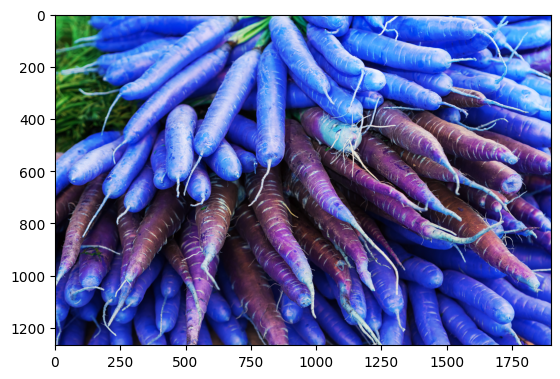

In [24]:
mp.pyplot.imshow(tempImage) # different color coz cv2 reads images as BGR not RGB

Plotting the image in the correct way

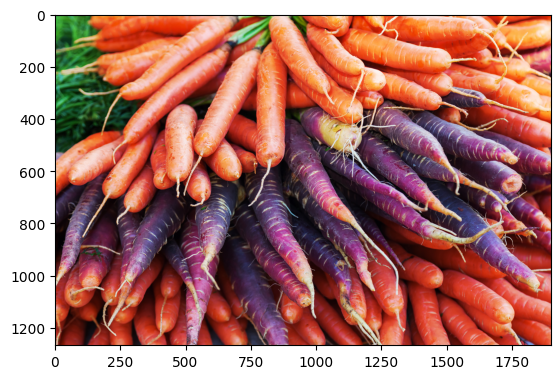

In [25]:
mp.pyplot.imshow(cv2.cvtColor(tempImage, cv2.COLOR_BGR2RGB)) # converts the format to rgb and rearranghes the channels

Removing bad, irregular, unecessary data

In [26]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# **Loading Data**

Using numpy and matplotlib

Using the data API provided by the tensorflow library

In [27]:
# tf.data.Dataset is an API provided by
# tensorflow for data manipulation but we use keras here

import numpy as np
from matplotlib import pyplot as plt


In [28]:
# dataset helper from keras
# does image preprocessing like creating
# labels and classes and resizing and grouping

data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 386 files belonging to 2 classes.


In [29]:
# converting it to a numpy iterator
# so we can easily access the elements of the 'data' element
data_iterator = data.as_numpy_iterator()

In [30]:
batch = data_iterator.next()

In [31]:
# each batch contains 32 images and 32 labels accordingly
# this is configured by the keras helper
# as follows
# tf.keras.utils.image_dataset_from_directory('data',batch_size=8,image_size=(128,128))

batch[0].shape # images represented as numpy arrays

(32, 256, 256, 3)

Displaying the images along with their classes



1 = Carrots

0 = Apples



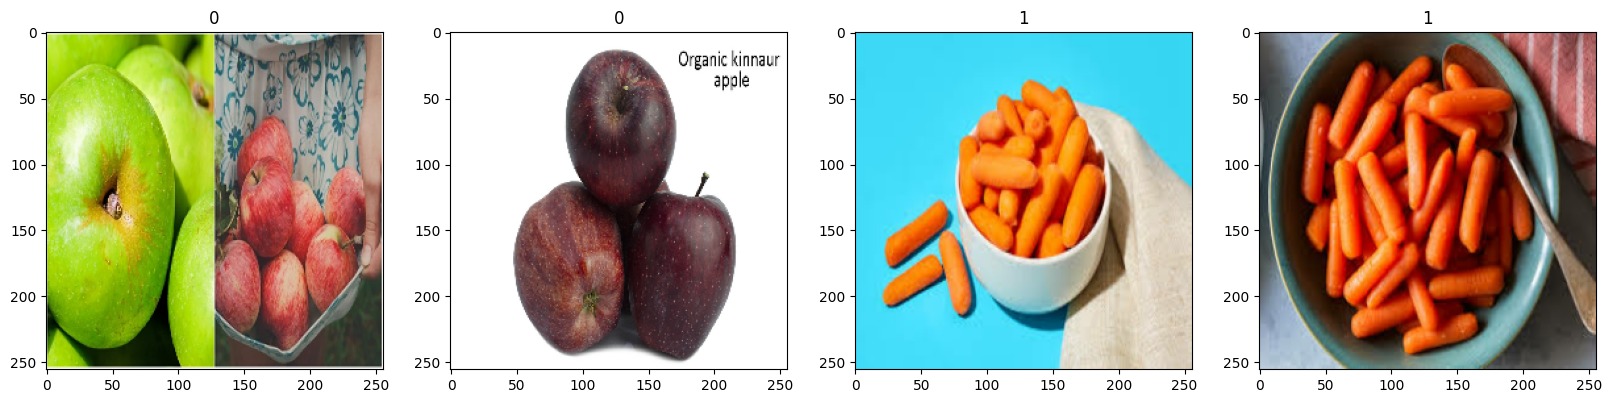

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [33]:
batch[0].shape
# 32 images 256x256 with 3 channels
# we need to normalise values which range from 0-255
# to 0-1 so our DL model optimises faster

(32, 256, 256, 3)

# **Pre Processing Data**

In [34]:
# data api provides this map function
data = data.map(lambda x,y:(x/255,y))


In [35]:
data.as_numpy_iterator().next() # shuffling is enabled so it doesnt return the same values

(array([[[[0.44313726, 0.6392157 , 0.87058824],
          [0.439928  , 0.6520527 , 0.87700677],
          [0.4474188 , 0.6849801 , 0.90030634],
          ...,
          [0.08508731, 0.11253829, 0.08116575],
          [0.0759421 , 0.10268076, 0.06988358],
          [0.04705882, 0.07058824, 0.03137255]],
 
         [[0.43671876, 0.62637866, 0.867379  ],
          [0.46502537, 0.66810524, 0.89743435],
          [0.4235688 , 0.65374005, 0.87227553],
          ...,
          [0.07575416, 0.10320514, 0.07183259],
          [0.0593129 , 0.08663449, 0.05500318],
          [0.02780331, 0.05454197, 0.02174479]],
 
         [[0.43802848, 0.61806065, 0.86940104],
          [0.47333026, 0.6684372 , 0.9069405 ],
          [0.40956998, 0.628819  , 0.85055023],
          ...,
          [0.06547947, 0.09293045, 0.0615579 ],
          [0.04990218, 0.07735316, 0.04598061],
          [0.02899816, 0.05644914, 0.02507659]],
 
         ...,
 
         [[0.5328661 , 0.7615043 , 0.99406403],
          [0.52420

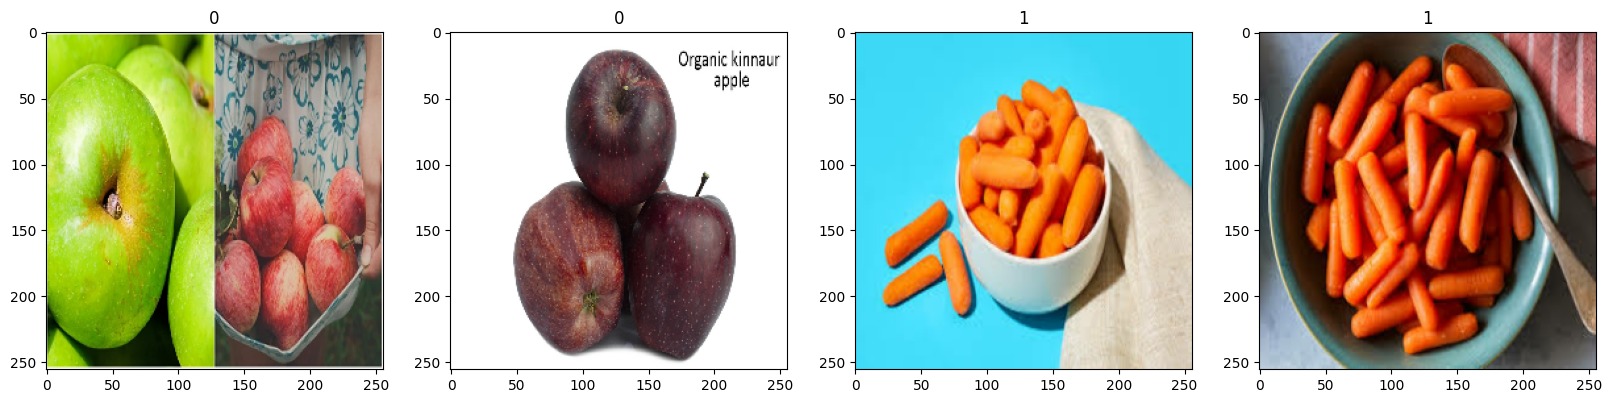

In [36]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**Splitting Data**

In [37]:
len(data)
# number of batches of 32 images

13

In [39]:
# 70% for training
train_size = int(len(data)*.7)

# 20% for validation
val_size = int(len(data)*.2) + 1

# testing 10%
test_size = int(len(data)*.1)

print(train_size,val_size,test_size)

9 3 1


In [40]:
# take() tells us how much we take
# skip() tells us how much we skip
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


# **Building the model**

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [42]:
model = Sequential()

In [43]:
# adds a convolution layer which acts as an input layer
# 16 filters for scanning, each filter is 3x3 pixel, stride is 1 pixel
# activation uses relu function which converts all -ve vals to 0 and +ve remains unchanged
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
# returns max (2,2)
model.add(MaxPooling2D())

# 32 filters, each 3x3 pixel size
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

# condensing the number of rows and columns and channels into a single parameter
model.add(Flatten())

# dense is a fully connected layer
model.add(Dense(256,activation = 'relu'))
# final output layer is a dense layer with single filter
# which either returns 0 or 1 according to the sigmoid function
model.add(Dense(1,activation = 'sigmoid'))
# 3,softmax


In [44]:
# using 'adam' optimiser and the metric we're tracking is accuracy
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
# categoricalCrossEntropy

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# **Training**

In [46]:
logdir = 'logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# used to keep checkpoints so you can revert it to any point

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 16s 812ms/step - loss: 0.9063 - accuracy: 0.4826 - val_loss: 0.6807 - val_accuracy: 0.5312
Epoch 2/20
9/9 [==============================] - 9s 756ms/step - loss: 0.6676 - accuracy: 0.6319 - val_loss: 0.6331 - val_accuracy: 0.5625
Epoch 3/20
9/9 [==============================] - 10s 834ms/step - loss: 0.5558 - accuracy: 0.7569 - val_loss: 0.4913 - val_accuracy: 0.7292
Epoch 4/20
9/9 [==============================] - 10s 950ms/step - loss: 0.4111 - accuracy: 0.8194 - val_loss: 0.2843 - val_accuracy: 0.9479
Epoch 5/20
9/9 [==============================] - 9s 850ms/step - loss: 0.3225 - accuracy: 0.8854 - val_loss: 0.2351 - val_accuracy: 0.9062
Epoch 6/20
9/9 [==============================] - 10s 802ms/step - loss: 0.2385 - accuracy: 0.9062 - val_loss: 0.2468 - val_accuracy: 0.8646
Epoch 7/20
9/9 [==============================] - 15s 1s/step - loss: 0.2136 - accuracy: 0.9236 - val_loss: 0.1733 - val_accuracy: 0.9479
Epoch 8/20
9/9 [==

one full run of the training dataset is known as 1 epoch

logs all information to the tensorboard_callback

uses the 'train' dataset

typically 'loss' should go down steadily and 'accuracy' should increase steadily

# **Plotting performance**

In [49]:
hist.history

{'loss': [0.9062666296958923,
  0.6675886511802673,
  0.5557578206062317,
  0.4110661447048187,
  0.3225245475769043,
  0.238490030169487,
  0.21361757814884186,
  0.1533895581960678,
  0.12172472476959229,
  0.09760323166847229,
  0.06111535802483559,
  0.05913256108760834,
  0.05031152069568634,
  0.027351753786206245,
  0.013360859826207161,
  0.019233157858252525,
  0.012906747870147228,
  0.013629581779241562,
  0.009749937802553177,
  0.0069823735393583775],
 'accuracy': [0.4826388955116272,
  0.6319444179534912,
  0.7569444179534912,
  0.8194444179534912,
  0.8854166865348816,
  0.90625,
  0.9236111044883728,
  0.9444444179534912,
  0.96875,
  0.9652777910232544,
  0.9756944179534912,
  0.9826388955116272,
  0.9895833134651184,
  0.9930555820465088,
  0.9965277910232544,
  0.9965277910232544,
  0.9965277910232544,
  0.9965277910232544,
  0.9965277910232544,
  0.9965277910232544],
 'val_loss': [0.6806833148002625,
  0.6330998539924622,
  0.4912780821323395,
  0.28425195813179016,

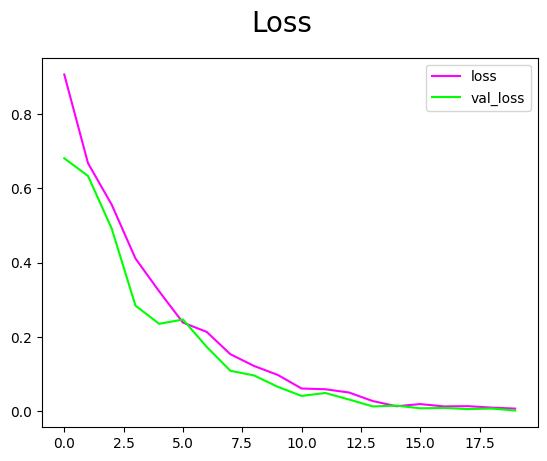

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='magenta', label='loss')
plt.plot(hist.history['val_loss'], color='lime', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

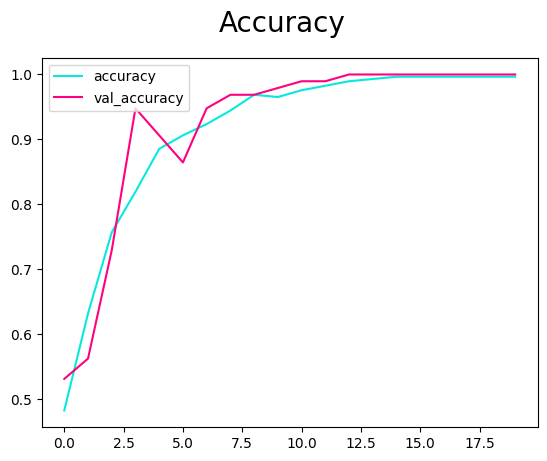

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='#08E8DE', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='#FF007F', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evaluate Performance**

In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
for batch in test.as_numpy_iterator():
    # x holds the images
    # y holds the labels
    X, y = batch
    # .predict() returns values bw 0 and 1
    yhat = model.predict(X)
    # updating metrics
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 269ms/step


In [55]:
print(f'Precision : {pre.result().numpy()}, Recall : {re.result().numpy()}, Accuracy : {acc.result().numpy()}')


Precision : 1.0, Recall : 1.0, Accuracy : 1.0


# **Test 1**

In [56]:
import cv2

file used here for testing is "appleTest.png" under the "Test Data" folder

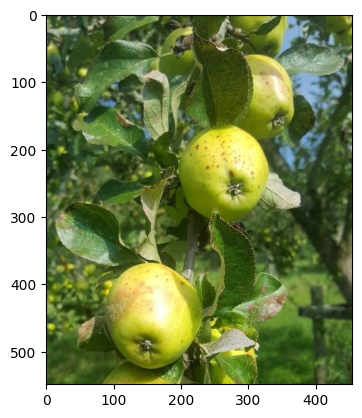

In [62]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Test Data/appleTest.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

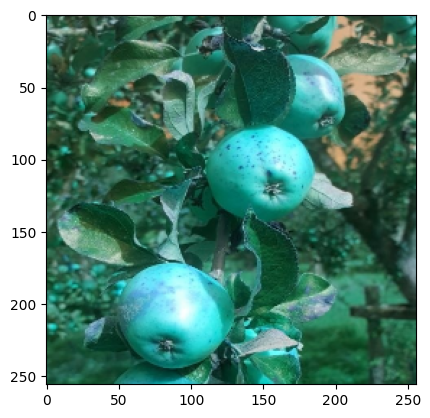

In [63]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 22ms/step


In [65]:
yhat

array([[0.01010801]], dtype=float32)

In [66]:
if yhat > 0.5:
  print("Predictor class is Carrots")
else:
  print("Predictor class is Apples")

Predictor class is Apples


# **Test 2**

file used here for testing is "carrotTest.jpg" under the "Test Data" folder

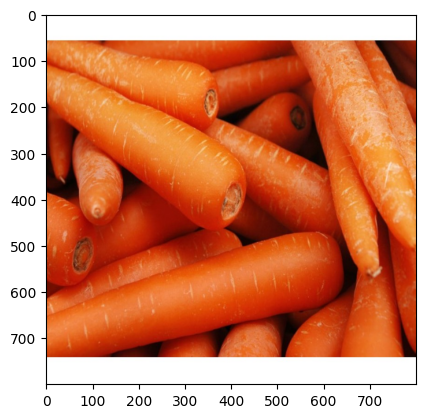

In [75]:
img2 = cv2.imread('/content/drive/MyDrive/Datasets/Test Data/carrotTest.jpg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

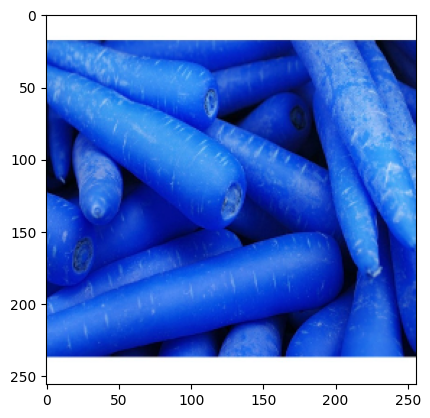

In [76]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [77]:
yhat2 = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 27ms/step


In [78]:
yhat2

array([[0.75683314]], dtype=float32)

In [79]:
if yhat2 > 0.5:
  print("Predictor class is Carrots")
else:
  print("Predictor class is Apples")

Predictor class is Carrots


# **Saving the model**

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))


**Reloading the saved model to predict again**

In [70]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 67ms/step


array([[0.01010801]], dtype=float32)